In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import svm

# Table of Contents

- [Exercise 9.7.1 (a)](#Exercise-9.7.1-(a)),
- [Exercise 9.7.1 (b)](#Exercise-9.7.1-(b)),
- [Exercise 9.7.2 (a)](#Exercise-9.7.2-(a)),
- [Exercise 9.7.2 (b)](#Exercise-9.7.2-(b)),
- [Exercise 9.7.2 (c)](#Exercise-9.7.2-(c)),
- [Exercise 9.7.2 (d)](#Exercise-9.7.2-(d)),
- [Exercise 9.7.3 (a)](#Exercise-9.7.3-(a)),
- [Exercise 9.7.3 (b)](#Exercise-9.7.3-(b)),
- [Exercise 9.7.3 (c)](#Exercise-9.7.3-(c)),
- [Exercise 9.7.3 (d)](#Exercise-9.7.3-(d)),
- [Exercise 9.7.3 (e)](#Exercise-9.7.3-(e)),
- [Exercise 9.7.3 (f)](#Exercise-9.7.3-(f)),
- [Exercise 9.7.3 (g)](#Exercise-9.7.3-(g)),
- [Exercise 9.7.3 (h)](#Exercise-9.7.3-(h)).

### Exercises 9.7.1

This problem involves hyperplanes in two dimensions.

#### Exercise 9.7.1 (a)

Sketch the hyperplane $1 + 3X_1 - X_2 = 0$. Indicate the set of points for which $1 + 3X_1 - X_2 \gt 0$, as well as the set of points for which $1 + 3X_1 - X_2 \lt 0$.

#### Exercise 9.7.2 (b)

On the same plot, sketch the hyperplane $−2 + X1 + 2X2 = 0$. Indicate the set of points for which $−2 + X1 + 2X2 \gt 0$, as well as the set of points for which $−2 + X1 + 2X2 \lt 0$.

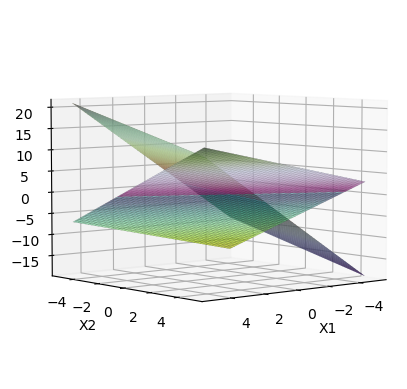

In [15]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = 1 + 3 * X1 - X2
Y2 = -2 + X1 + 2 * X2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=5, azim=50)

ax.plot_surface(X1, X2, Y, alpha=0.5, cmap='viridis', edgecolor='k', linewidth=0.1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

mask_pos = Y > 0
mask_neg = Y < 0

Y_pos = np.ma.masked_array(Y, ~mask_pos)
Y_neg = np.ma.masked_array(Y, ~mask_neg)

ax.plot_surface(X1, X2, Y_pos, alpha=0.5, cmap='RdYlBu', label='$1 + 3X_1 - X_2 \gt 0$');
ax.plot_surface(X1, X2, Y_neg, alpha=0.5, cmap='RdYlBu_r', label='$1 + 3X_1 - X_2 \lt 0$');

ax.plot_surface(X1, X2, Y2, alpha=0.5, cmap='viridis_r', edgecolor='k', linewidth=0.1)

mask_pos = Y2 > 0
mask_neg = Y2 < 0

Y2_pos = np.ma.masked_array(Y2, ~mask_pos)
Y2_neg = np.ma.masked_array(Y2, ~mask_neg)

ax.plot_surface(X1, X2, Y2_pos, alpha=0.5, cmap='PiYG', label='$-2 + X_1 + 2X_2 \gt 0$');
ax.plot_surface(X1, X2, Y2_neg, alpha=0.5, cmap='PiYG_r', label='$-2 + X_1 + 2X_2 \lt 0$');

### Exercise 9.7.2 

We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form of $\beta_0 + \beta_1X_1 + \beta_2X_2 = 0$. We now investigate a non-linear decision boundary.



#### Exercise 9.7.2 (a)

Sketch the curve:

$$
(1 + X_1)^{2} + (2 - X_2)^{4} = 4
$$

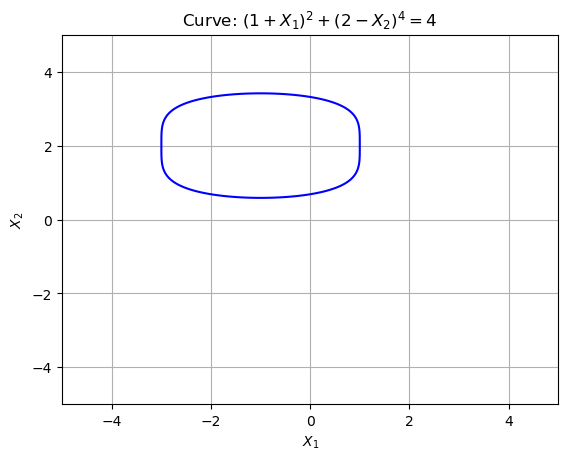

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def curve_equation(x1, x2):
    return (1 + x1)**2 + (2 - x2)**4 - 4


x1_values = np.linspace(-5, 5, 5000)
x2_values = np.linspace(-5, 5, 5000)

x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
z_values = curve_equation(x1_mesh, x2_mesh)

plt.contour(x1_mesh, x2_mesh, z_values, levels=[0], colors='b')
plt.title('Curve: $(1 + X_1)^2 + (2 - X_2)^4 = 4$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True);


#### Exercise 9.7.2 (b)

On your sketch, indicate the set of points for which 

$$
(1 + X_1)^{2} + (2 - X_2)^{2} \gt 4
$$

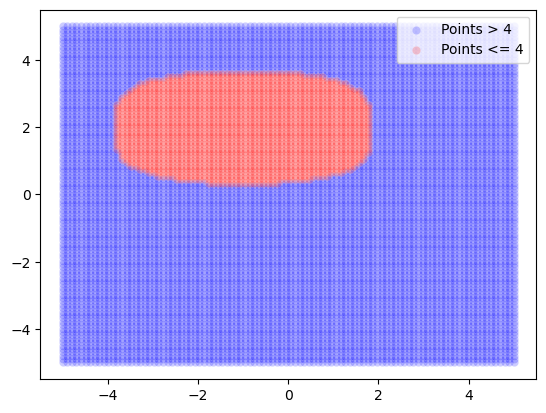

In [17]:
def curve_equation(x1, x2):
    return (1 + x1)**2 + (2 - x2)**4 - 4


x1_values = np.linspace(-5, 5, 100)
x2_values = np.linspace(-5, 5, 100)

x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
z_values = curve_equation(x1_mesh, x2_mesh)

mask = z_values > 4
sns.scatterplot(x=x1_mesh[mask], y=x2_mesh[mask], color='b', alpha=0.2, label='Points > 4')

mask = z_values <= 4
sns.scatterplot(x=x1_mesh[mask], y=x2_mesh[mask], color='r', alpha=0.2, label='Points <= 4');


#### Exercise 9.7.2 (c)

Suppose that the classifier assings an observation to the blue class if 

$$
(1 + X_1)^{2} + (2 - X_2)^{2} \gt 4
$$

and to the class red, otherwise. To what class is the observation $(0, 0)$ classified? $(-1, 1)$? $(2, 2)$? $(3, 8)$?

In [18]:
observations = [(0, 0), (-1, 1), (2, 2), (3, 8)]

for x1, x2 in observations:
    y_hat = curve_equation(x1, x2)
    if y_hat > 4:
        print(f'({x1}, {x2}) classified to the blue class')
    else:
        print(f'({x1}, {x2}) classified to the red class')

(0, 0) classified to the blue class
(-1, 1) classified to the red class
(2, 2) classified to the blue class
(3, 8) classified to the blue class


#### Exercise 9.7.2 (d)

Argue that while decision boundary in [(c)](#Exercise-9.7.2-c) is not linear in terms of $X_1$ and $X_2$, it is linear  in terms of $X_1, X_1^{2}, X_2$ and $X_2^{2}$.

__Answer__:

Let investigate and expand the equation:

$$
\begin{align*}
(1 + X_1)^{2} + (2 - X_2)^{2} \gt 4 \\
1 + 2X_1 + X_1^{2} + 4 - 4X_2 + X_2^{2} \gt 4 \\ 
5 + 2X_1 - 4X_2 + X_1^{2} + X_2^{2} \gt 4 \\
\end{align*}
$$ 

This equation reminds us our linear model, which is defined as:

$$
\beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1^{2} + \beta_4X_2^{2} \gt 4
$$

We can subsitute the values of $\beta_0, \dots, \beta_4$ from our simplified equation.

#### Exercise 9.7.3

Here, we explore the maximal margin classifier on a toy data set.



#### Exercise 9.7.3 (a)

We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is associated class label.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Obs.</th>
    <th class="tg-0pky">$X_1$</th>
    <th class="tg-0pky">$X_2$</th>
    <th class="tg-0pky">Y</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Red</td>
  </tr>
  <tr>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">Red</td>
  </tr>
  <tr>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Red</td>
  </tr>
  <tr>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">Red</td>
  </tr>
  <tr>
    <td class="tg-0pky">5</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">Blue</td>
  </tr>
  <tr>
    <td class="tg-0pky">6 </td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">Blue</td>
  </tr>
  <tr>
    <td class="tg-0pky">7</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">Blue</td>
  </tr>
</tbody>
</table>

Sketch the observations.

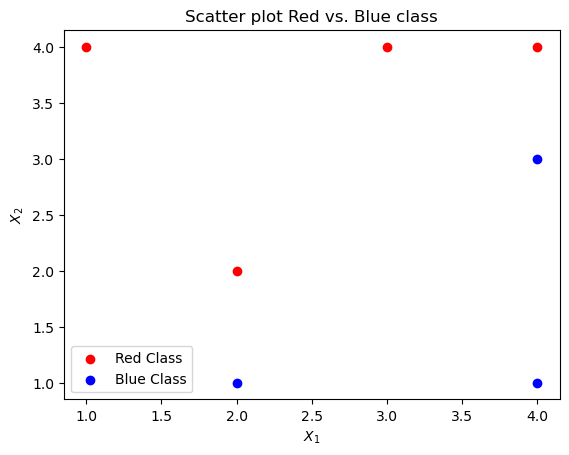

In [19]:
observations = [
    (3, 4, 0),
    (2, 2, 0),
    (4, 4, 0),
    (1, 4, 0),
    (2, 1, 1),
    (4, 3, 1),
    (4, 1, 1)
] # 0 - red class, 1 - blue class

red_class = [obs[:2] for obs in observations if obs[2] == 0]
blue_class = [obs[:2] for obs in observations if obs[2] == 1]

plt.title('Scatter plot Red vs. Blue class')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.scatter(*zip(*red_class), color='red', label='Red Class')
plt.scatter(*zip(*blue_class), color='blue', label='Blue Class')
plt.legend();

#### Exercise 9.7.3 (b)

Sketch the optimal separating hyperplane, and provide the equation for this hyperplane of the form:

$$
\beta_0 + \beta_1X_1 + \beta_2X_2 = 0
$$

__Answer__:

$$
X_1 - X_2 - 0.5= 0
$$

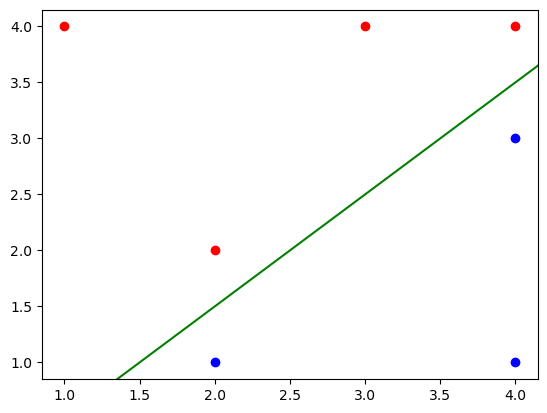

In [20]:
X = np.array([obs[:2] for obs in observations])
y = np.array([obs[2] for obs in observations])

plt.scatter(*zip(*X[y == 0]), color='red', label='Red Class')
plt.scatter(*zip(*X[y == 1]), color='blue', label='Blue Class')

plt.axline(xy1=(2, 1.5), xy2=(4, 3.5), color='green');

#### Exercise 9.7.3 (c)

Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1X_1 + \beta_2X_2 \gt 0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

__Answer__:

- the decision function of the SVM is: predict to the class red if $\beta_0 + \beta_1X_1 + \beta_2X_2 \lt 0$ and classify to Blue class otherwise,
- the parameters are: $\beta_0=0.84$, $\beta_1=0.61$, $\beta_2=-1.076$

#### Exercise 9.7.3 (d)

On your sketch, indicate the margin for the maximal margin hyperplane.


#### Exercise 9.7.3 (e)

Indicate the support vectors for maximal margin classifier.

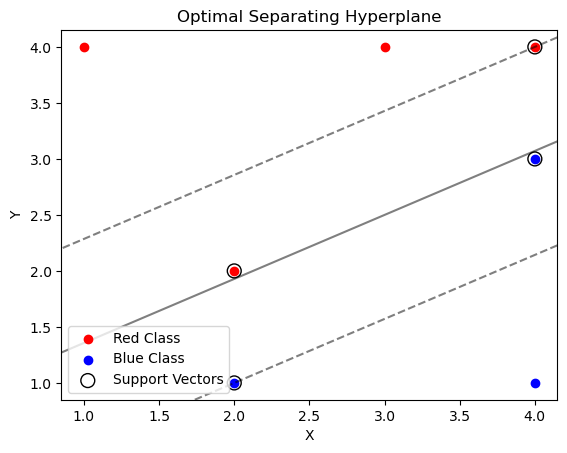

In [21]:
X = np.array([obs[:2] for obs in observations])
y = np.array([obs[2] for obs in observations])

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(*zip(*X[y == 0]), color='red', label='Red Class')
plt.scatter(*zip(*X[y == 1]), color='blue', label='Blue Class')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')


plt.title('Optimal Separating Hyperplane')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

In [22]:
clf.intercept_, clf.coef_

(array([0.84615385]), array([[ 0.61538462, -1.07692308]]))

#### Exercise 9.7.3 (f)

Argue that a slight movement of the seventh observation would
not affect the maximal margin hyperplane.

__Answer__:

- It would not change the decision boundary so much, as you can see $x_{7} = (4, 1)$ was changed to $x_7 = (5, 1)$ and decision boundary is not hugely affected, the observation is not support vector which has no effect on decision boundary.

In [23]:
observations[-1]

(4, 1, 1)

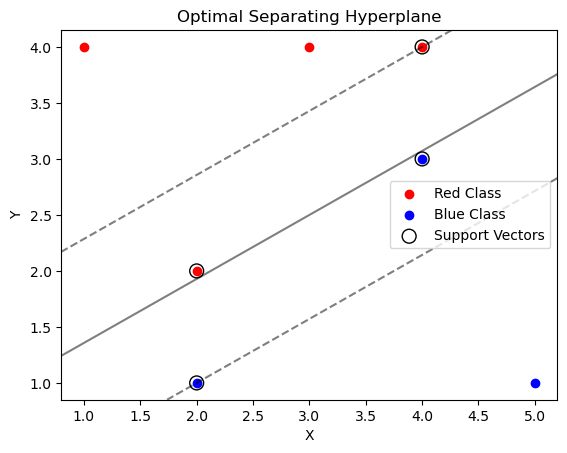

In [24]:
observations[-1] = (5, 1, 1)

X = np.array([obs[:2] for obs in observations])
y = np.array([obs[2] for obs in observations])

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.scatter(*zip(*X[y == 0]), color='red', label='Red Class')
plt.scatter(*zip(*X[y == 1]), color='blue', label='Blue Class')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')


plt.title('Optimal Separating Hyperplane')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

#### Exercise 9.7.3 (g)

Sketch a hyperplane that is *not* the optimal separating hyperplane, and provide the equation for this hyperplane.

__Answer__:

$$
1−0.6X1​+X2​=0
$$

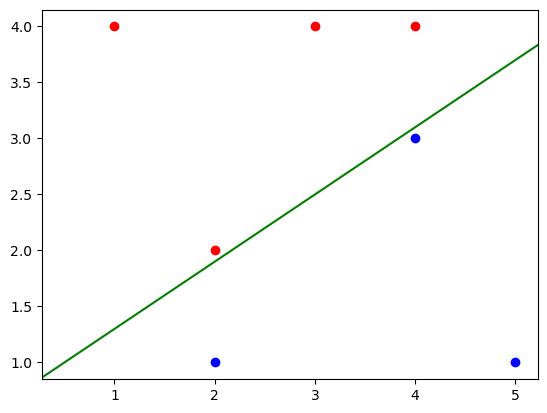

In [25]:
X = np.array([obs[:2] for obs in observations])
y = np.array([obs[2] for obs in observations])

plt.scatter(*zip(*X[y == 0]), color='red', label='Red Class')
plt.scatter(*zip(*X[y == 1]), color='blue', label='Blue Class')

plt.axline(xy1=(0.5, 1), slope=0.6, color='green');

#### Exercise 9.7.3 (h)

Draw an additional observation on the plot so that the two classes are no longer separable by hyperplane.

__Answer__:

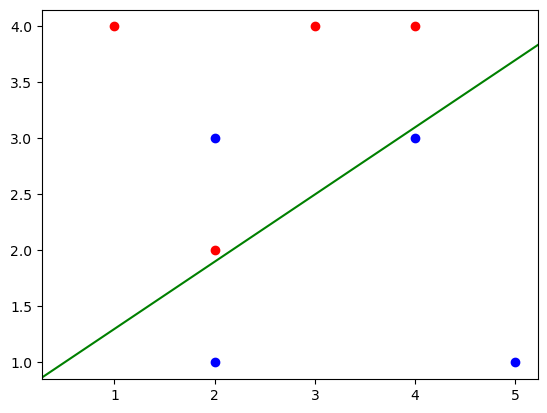

In [26]:
observations += [(2, 3, 1)]

X = np.array([obs[:2] for obs in observations])
y = np.array([obs[2] for obs in observations])

plt.scatter(*zip(*X[y == 0]), color='red', label='Red Class')
plt.scatter(*zip(*X[y == 1]), color='blue', label='Blue Class')

plt.axline(xy1=(0.5, 1), slope=0.6, color='green');